# Titanic - Machine Learning from Disaster

## Load and normalize the data

In [1]:
from fastcore.all import Path
from fastai.tabular.all import TabularDataLoaders, Categorify, FillStrategy, FillMissing, Normalize
from fastai.data.all import CategoryBlock, Normalize


dataloaders = TabularDataLoaders.from_csv(
  csv="titanic/train.csv",
  procs=[Categorify, FillMissing(fill_strategy=FillStrategy.median, add_col=False)],
  cont_names=["Age", "Parch", "SibSp", "Fare"],
  cat_names=["Pclass", "Sex", "Embarked"],
  y_names=["Survived"],
  y_block=CategoryBlock,
)

print(dataloaders.procs.categorify)
dataloaders.show_batch()

Categorify -- {'classes': {'Pclass': ['#na#', 1, 2, 3], 'Sex': ['#na#', 'female', 'male'], 'Embarked': ['#na#', 'C', 'Q', 'S']}}:
encodes: (object,object) -> encodes
decodes: (object,object) -> decodes



,Pclass,Sex,Embarked,Age,Parch,SibSp,Fare,Survived
0,3,male,S,17.00,0.0,0.0,8.662500,0
1,1,female,S,25.00,2.0,1.0,151.550003,0
2,3,male,S,28.00,0.0,0.0,8.050000,0
3,3,male,S,30.00,0.0,0.0,9.500000,1
4,3,male,S,26.00,2.0,1.0,20.575001,0
5,1,female,C,24.00,0.0,0.0,69.300003,1
6,2,male,S,0.67,1.0,1.0,14.500000,1
7,1,male,S,70.00,1.0,1.0,71.000000,0
8,3,male,C,28.00,0.0,0.0,7.229200,0
9,3,female,S,22.00,0.0,0.0,9.837500,0


## Setup and train the model

In [2]:
from fastai.tabular.all import tabular_learner
from fastai.metrics import accuracy


learner = tabular_learner(dataloaders, metrics=[accuracy])
learner.fit_one_cycle(20)
learner.show_results()

,Pclass,Sex,Embarked,Age,Parch,SibSp,Fare,Survived,Survived_pred
0,2.0,1.0,3.0,42.0,0.0,0.0,13.000000,1.0,1.0
1,1.0,1.0,3.0,63.0,0.0,1.0,77.958298,1.0,1.0
2,3.0,2.0,3.0,36.0,0.0,0.0,7.895800,0.0,0.0
3,2.0,2.0,3.0,43.0,1.0,1.0,26.250000,0.0,0.0
4,3.0,2.0,3.0,28.0,0.0,0.0,8.050000,0.0,0.0
5,1.0,2.0,3.0,62.0,0.0,0.0,26.549999,0.0,0.0
6,2.0,2.0,3.0,28.0,0.0,0.0,13.000000,1.0,0.0
7,2.0,2.0,3.0,31.0,0.0,0.0,10.500000,0.0,0.0
8,1.0,2.0,1.0,56.0,0.0,0.0,35.500000,1.0,0.0


## Verify model performance and make predictions results

              precision    recall  f1-score   support

           0       0.86      0.93      0.89       116
           1       0.85      0.71      0.77        62

    accuracy                           0.85       178
   macro avg       0.85      0.82      0.83       178
weighted avg       0.85      0.85      0.85       178



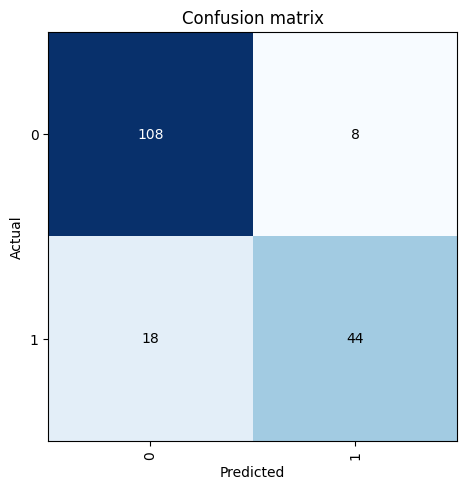

In [3]:
from fastai.interpret import ClassificationInterpretation


interpret = ClassificationInterpretation.from_learner(learner)
interpret.plot_confusion_matrix()
interpret.print_classification_report()

In [4]:
import pandas as pd
from fastai.tabular.all import TabularDataLoaders, Datasets


test_data = pd.read_csv("titanic/test.csv")
dl = learner.dls.test_dl(test_data)
preds = learner.get_preds(dl=dl, with_decoded=True)[-1].numpy()

output_preds = pd.DataFrame({"PassengerId": test_data.PassengerId, "Survived": preds})
output_preds.to_csv("titanic/submission.csv", index=False)
output_preds

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
